## Análise Preditiva de Derrame

### Contexto
- De acordo com a Sociedade Brasileira de Doenças Cerebrovasculares, o acidente vascular cerebral (AVC) é definido como um déficit neurológico súbito causado por um problema nos vasos sanguíneos do sistema nervoso central. Muitas pessoas usam o termo “derrame” quando o paciente sofre este episódio.    

##### Como se desenvolve o AVC
- “O AVC – acidente vascular cerebral (ou AVE; acidente vascular encefálico) – é conhecido popularmente como ‘derrame’ ou ‘trombose’. Este episódio pode ser classificado em dois tipos: AVC isquêmico, quando a artéria do cérebro se obstrui e ocasiona, consequentemente, uma isquemia (falta de sangue em determinada região); ou AVC hemorrágico, que é quando a artéria cerebral se rompe e causa um sangramento, uma hemorragia dentro do cérebro”, informa o cardiologista Francisco Flávio Costa Filho. 
- Segundo o especialista, o termo “trombose” estaria mais associado, na linguagem popular, ao AVC isquêmico, porque a obstrução da artéria ocorre em função da presença de um trombo. Já o termo “derrame” estaria mais associado ao AVC hemorrágico, porque o sangue “se derrama” dentro do cérebro.
- “No caso do AVC isquêmico, níveis elevados de pressão associados a outros fatores de risco (diabetes, colesterol elevado e tabagismo) levam à inflamação das artérias cerebrais, levando a formação de placas de colesterol ou espessamento da camada interna, até que obstrui completamente o vaso. No AVC Hemorrágico, esse mesmo processo inflamatório deixa a parede do vaso cerebral fragilizada de tal forma que ela, literalmente, se rompe, gerando o hematoma”, explica o cardiologista.

##### Prevenção e tratamento contra hipertensão e derrame
- Como a elevação da pressão está diretamente ligada à ocorrência do AVC, é essencial buscar formas de prevenir e tratar a hipertensão para, assim, diminuir também as chances de “derrame”. Portanto, deve-se apostar em uma alimentação saudável – nutritiva e pouco gordurosa e calórica – prática regular de atividades físicas, especialmente aeróbicas (corrida, ciclismo, natação, caminhada) e evitar fumar e ingerir bebidas alcoólicas em excesso. O tratamento medicamentoso contra hipertensão também é fundamental.

### Base de Dados
- A base de dados foi retirada do site kaggle: 'https://www.kaggle.com/fedesoriano/stroke-prediction-dataset?select=healthcare-dataset-stroke-data.csv';
- A fonte da base é confidencial.

##### Atributos:
- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not
  
  *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### Expectativas Iniciais

- desenvolver um modelo de classificação capaz de dar apoio a avaliação de risco de derrame em pacientes.

### Importando Bibliotecas
----

In [51]:
import numpy as np 
import requests
import pandas as pd
import plotly
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import pycaret
from pandas_profiling import ProfileReport
from pycaret.classification import *
from io import StringIO
from sklearn.model_selection import train_test_split 

plt.style.use('ggplot')

### Upload da base de dados
----

In [52]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv', encoding='latin1')
#display(df)
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


### Tratando valores nulos
----

In [53]:
# Itera cada coluna no arquivo
for coluna in df:
    # Se a coluna inteira tiver mais de 300 estão vazias...
    if df[coluna].isnull().sum() > 300:
        # Deleta a coluna
        df = df.drop(coluna, axis=1)
# Imprime somatório de campos vazios por coluna        
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [54]:
# Exclui todas as linhas que tiverem valores vazios
df = df.dropna()

# Imprime quantidade de linhas e colunas
print(df.shape)
# Imprime somatório de campos vazios por coluna 
print(df.isnull().sum())

(4909, 12)
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


### Análise dos tipos de dados e características das colunas
----

In [55]:
# Imprime o tipo de dado à cada coluna
print(df.dtypes)
# Imprime 60 -
print('-'*60)
# Imprime primeiro registro(linha) de cada coluna
print(df.iloc[0])


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
------------------------------------------------------------
id                              9046
gender                          Male
age                             67.0
hypertension                       0
heart_disease                      1
ever_married                     Yes
work_type                    Private
Residence_type                 Urban
avg_glucose_level             228.69
bmi                             36.6
smoking_status       formerly smoked
stroke                             1
Name: 0, dtype: object


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4909.0,37064.313506,20995.098457,77.00,18605.00,37608.00,55220.00,72940.00
age,4909.0,42.865374,22.555115,0.08,25.00,44.00,60.00,82.00
hypertension,4909.0,0.091872,0.288875,0.00,0.00,0.00,0.00,1.00
heart_disease,4909.0,0.049501,0.216934,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4909.0,105.305150,44.424341,55.12,77.07,91.68,113.57,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.50,28.10,33.10,97.60
stroke,4909.0,0.042575,0.201917,0.00,0.00,0.00,0.00,1.00


#### Exportando o Arquivo de analise de dados preliminar 

In [57]:
profile = ProfileReport(df, title='Profiling Strokes',html={'style':{'full_width':True}})

In [58]:
profile.to_file('dataframe_report.html')

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Apresentação inicial da % de cada atributo
----

In [59]:
#!pip install plotly_express

import plotly_express as pe

cols = ["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status","stroke"]
for col in cols:
    fig = pe.pie(values=df[col].groupby(df[col]).count(),names=df[col].groupby(df[col]).count().index,title="Distribution of {}".format(col))
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

#### Notas

###### De acordo com os gráficos iniciais:
- Pessoas do sexo feminino sofrem proporcionalmente mais derrame;
- O quadro de hipertensão tem peso de quase 90% para potencial derrame;
- O histórico de doenças cardíacas tem peso de 95% para potencial derrame;
- A situação de histórico de casamento (atual ou já foi casado) tem relevância arredondada de 65% para a análise do caso;
- Quem trabalha em empresa privada tem mais da metade (57%) de chance de sofrer derrame do que o somatório de todos os outros tipos de distribuição de trabalho (próprio, com crianças e público). Desdes, a menor probabilidade está no setor público;
- O dado de tipo de residência - rural ou urbano - não tem muito diferencial, considerando uma distribuição proporcional equivalente: 49,3% para 50,7%;
- Não foi visto uma proporção alarmante entre o fator 'fumante' para a análise do caso;
- De todos os pesquisados, 4,26% já tiveram derrame.

### Tratamento das colunas não numéricas
----

In [60]:
# Retorna todas as colunas que não são int64 ou float64
df.select_dtypes(exclude=['int64','float64']).columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [61]:
# Tratando informações

#gender
df = df[(df["gender"] =="Male")|(df["gender"] =="Female")]
df.gender.replace({'Male': 1, 'Female': 0}, inplace=True)
#ever_married 
df.ever_married.replace({'No': 0, 'Yes': 1}, inplace=True)
#work_type
df.work_type.replace({'Private': 0, 'Self-employed': 1, 'children': 2,'Govt_job':3,'Never_worked':4}, inplace=True)
#Residence_type
df.Residence_type.replace({'Urban': 0, 'Rural': 1}, inplace=True)
#smoking_status
df.smoking_status.replace({'never smoked': 0, 'Unknown': 1,'formerly smoked':2,'smokes':3}, inplace=True)

print(df.dtypes)
display(df)

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0,0,228.69,36.6,2,1
2,31112,1,80.0,0,1,1,0,1,105.92,32.5,0,1
3,60182,0,49.0,0,0,1,0,0,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,1,1,174.12,24.0,0,1
5,56669,1,81.0,0,0,1,0,0,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,0,2,1,103.08,18.6,1,0
5106,44873,0,81.0,0,0,1,1,0,125.20,40.0,0,0
5107,19723,0,35.0,0,0,1,1,1,82.99,30.6,0,0
5108,37544,1,51.0,0,0,1,0,1,166.29,25.6,2,0


### Mapeamento da Correlação
----

In [62]:
df = df.drop('id', axis=1)

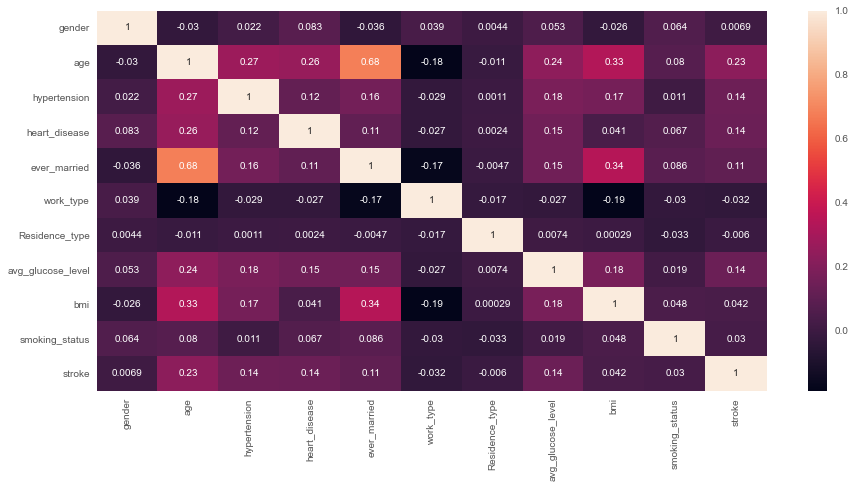

In [63]:
plt.figure(figsize=(15,7))
sns.heatmap(dfidignore.corr(),annot=True);

#### Notas

- Gênero não tem relação significativa direta com derrame;
- BMI não tem relação significativa direta com derrame;
- Tipo de Residência é insignificante diretamente com relação à derrame;
- O elemento que mais se aproxima no impacto direto ao diagnóstico de derrame é a idade;
- Decidimos manter as colunas não significativas em comparação à saída do dado 'stroke' porquê outras relações importantes podem ser feitas entre elas, por exemplo, bmi x ever_married ou bmi x age.

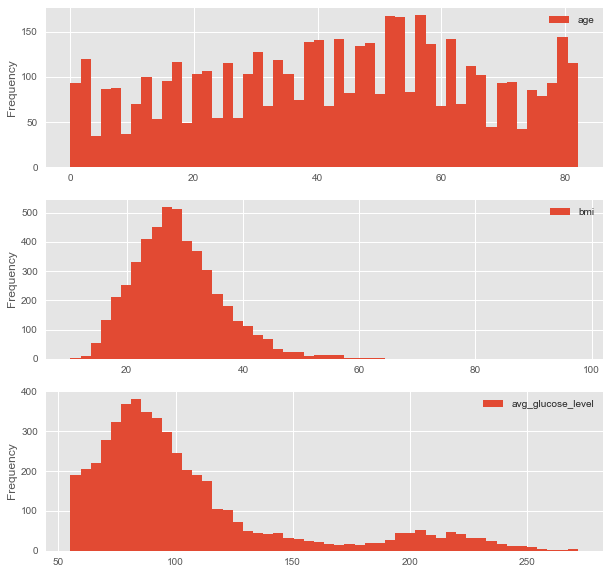

In [64]:
fig, axes = plt.subplots(3, figsize=(10, 10))

df.plot(kind="hist", y="age", bins=50, ax=axes[0])
df.plot(kind="hist", y="bmi", bins=50, ax=axes[1])
df.plot(kind="hist", y="avg_glucose_level", bins=50, ax=axes[2])
plt.show()

#### Notas

###### Índice de massa corporal
- Menor que 18,5	  Magreza	  0
- Entre 18,5 e 24,9	  Normal	  0
- Entre 25,0 e 29,9	  Sobrepeso	  Obesidade I
- Entre 30,0 e 39,9	  Obesidade	  Obesidade II

###### Nível de Glicose
- Glicemia de jejum normal: inferior a 99 mg/dL;
- Glicemia de jejum alterada: entre 100 mg/dL e 125 mg/dL;
- Diabetes: igual ou superior a 126 mg/dL;
- Glicemia de jejum baixa ou hipoglicemia: igual ou inferior a 70 mg/dL.

----------------------------------------------------------------
###### Sobre o público, observa-se dente os dados da base
- Há uma distribuição relativamente equilibrada, tendo um singelo crescimento do gráfico entre 55 e 60 anos;
- Um número muito elevado de pessoas entre 25 e 30 pontos no IMC, o que significa que a maioria tem sobrepeso;
- A grande maioria da população da base está com a glicemia normal, mas vemos resultados alarmantes no gráfico. Não o suficiente para considerar outlier. 

### Relacionamento em pares
----

In [65]:
def plot_mixing_features(features):
    sns.pairplot(dfidignore[features], 
            kind='reg', 
            plot_kws={'line_kws':{'color':'b'}, 'scatter_kws': {'alpha': 0.1}}),
             
    plt.show()

In [66]:
# Seleciona características/comorbidades numéricas (diferentes de enum e bool)
features = ['age', 'avg_glucose_level','bmi']
# Mostrar status básico
dfidignore[features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4908.0,42.868810,22.556128,0.08,25.0000,44.00,60.000,82.00
avg_glucose_level,4908.0,105.297402,44.425550,55.12,77.0675,91.68,113.495,271.74
bmi,4908.0,28.894560,7.854320,10.30,23.5000,28.10,33.100,97.60


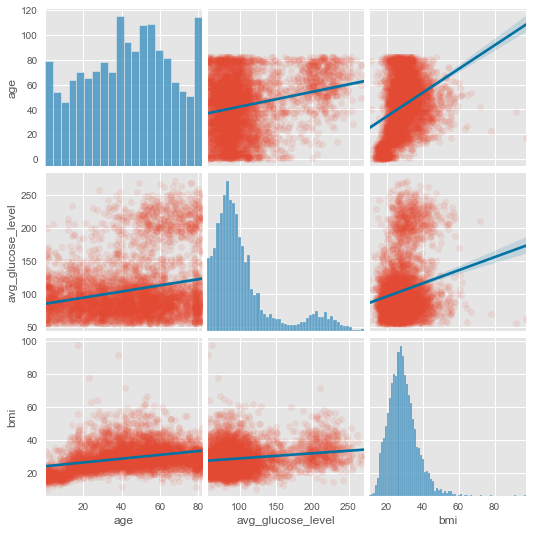

In [67]:
plot_mixing_features(features)

In [68]:
fig = ff.create_2d_density(
    x=df['avg_glucose_level'],
    y=df['bmi'],
    title="Taxa de glicose x BMI",
    colorscale=['#7A4579', '#D56073', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]
)
fig.show()
fig = ff.create_2d_density(
    x=df['ever_married'],
    y=df['bmi'],
    title="Casamento x BMI",
    colorscale=['#7A4579', '#D56073', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]
)
fig.show()
fig = ff.create_2d_density(
    x=df['ever_married'],
    y=df['avg_glucose_level'],
    title="Casamento x Taxa de glicose",
    colorscale=['#7A4579', '#D56073', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]
)
fig.show()

#### Notas

- O nível de glicose médio se mantém estável em uma média entre 100 e 125 mg/dL até os 43 anos
    * A partir dos 45 anos o número de casos de alta glicose no sangue aumenta, chegando a casos mais graves próximo a 60 anos
- Vemos que entre as idades de 30 e 60 anos o BMI da amostra apresenta situação de obesidade nível I
- Existe uma relevante paridade entre as features de BMI e nível de glicose. Ambas crescem em proporção semelhante.

## Desenvolvimento do Modelo de Classificação - Pycaret

#### Separando dados para avaliação do Modelo

In [69]:
df_bruto = df
df, df_valid = train_test_split(
    df_bruto,
    test_size= 0.2,
    stratify= df_bruto['stroke'],
    random_state= 123
)

## As proporções são mantidas

In [70]:
df.reset_index(inplace=True, drop=True)

In [71]:
df.groupby(['stroke']).age.count()[1]/df.groupby(['stroke']).age.count()[0]

0.0444267092311785

In [72]:
df_valid.reset_index(inplace=True, drop=True)

In [73]:
df_valid.groupby(['stroke']).age.count()[1]/df_valid.groupby(['stroke']).age.count()[0]

0.04468085106382979

### Configuração do Ambiente

In [74]:
confi_classificacao_diabetes = setup(data = df, target = 'stroke', session_id=123)

,Description,Value
0,session_id,123
1,Target,stroke
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(3926, 11)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

### Treinando Modelos sem tunagem de hyperparâmetros

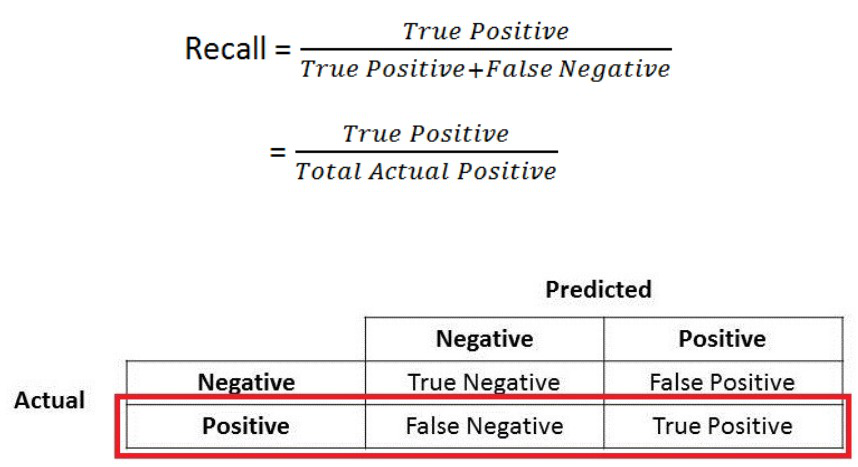

In [28]:
from PIL import Image

image = Image.open('matriz_confusao.png')
image

##fonte: encurtador.com.br/eDMNX

#### Avaliação por Recall

In [75]:
best_model = compare_models(sort = 'Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5721,0.8113,0.8924,0.0792,0.1454,0.0769,0.1791,0.0080
qda,Quadratic Discriminant Analysis,0.6489,0.4807,0.2977,0.0393,0.0669,-0.0036,-0.0139,0.0090
svm,SVM - Linear Kernel,0.9239,0.0000,0.1621,0.1936,0.1160,0.0941,0.1172,0.0080
dt,Decision Tree Classifier,0.9250,0.5469,0.1356,0.1224,0.1282,0.0894,0.0896,0.0070
lda,Linear Discriminant Analysis,0.9531,0.8438,0.0447,0.2233,0.0704,0.0558,0.0776,0.0070
gbc,Gradient Boosting Classifier,0.9578,0.8347,0.0439,0.1500,0.0676,0.0600,0.0708,0.0430
et,Extra Trees Classifier,0.9538,0.7488,0.0356,0.2000,0.0579,0.0450,0.0653,0.0510
lightgbm,Light Gradient Boosting Machine,0.9560,0.8239,0.0356,0.1833,0.0567,0.0469,0.0645,0.0190
rf,Random Forest Classifier,0.9592,0.7974,0.0182,0.1000,0.0308,0.0280,0.0390,0.0600
ada,Ada Boost Classifier,0.9560,0.8038,0.0174,0.1500,0.0308,0.0223,0.0385,0.0250


A avaliação foi improdutiva pois diversos modelos apresentaram Recall baixou e até zero.

Isso indica que os modelos, como visível na matriz de confusão abaixo usando logistic regression, estão classificando sempre a mesma classe.

Isso pode ser um sintoma da base ser desbalanceada em suas classes.

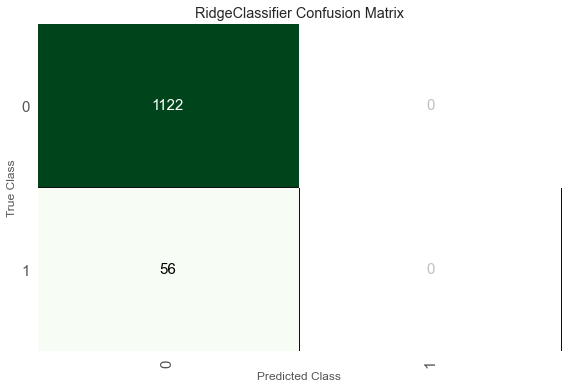

In [76]:
plot_model(create_model('ridge'), plot = 'confusion_matrix')

#### Avaliando por AUC

In [77]:
best_model = compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9596,0.8483,0.0000,0.0000,0.0000,0.0000,0.0000,0.0420
lda,Linear Discriminant Analysis,0.9531,0.8438,0.0447,0.2233,0.0704,0.0558,0.0776,0.0080
gbc,Gradient Boosting Classifier,0.9578,0.8347,0.0439,0.1500,0.0676,0.0600,0.0708,0.0430
lightgbm,Light Gradient Boosting Machine,0.9560,0.8239,0.0356,0.1833,0.0567,0.0469,0.0645,0.0170
nb,Naive Bayes,0.5721,0.8113,0.8924,0.0792,0.1454,0.0769,0.1791,0.0070
ada,Ada Boost Classifier,0.9560,0.8038,0.0174,0.1500,0.0308,0.0223,0.0385,0.0270
rf,Random Forest Classifier,0.9592,0.7974,0.0182,0.1000,0.0308,0.0280,0.0390,0.0570
et,Extra Trees Classifier,0.9538,0.7488,0.0356,0.2000,0.0579,0.0450,0.0653,0.0610
knn,K Neighbors Classifier,0.9534,0.6642,0.0000,0.0000,0.0000,-0.0103,-0.0142,0.0200
dt,Decision Tree Classifier,0.9250,0.5469,0.1356,0.1224,0.1282,0.0894,0.0896,0.0090


Utilizar a métrica AUC é util quando estamos realizando classificação e é melhor para avaliar modelos em cross-validação.

## Modelos Selecionados:
### Critérios:
    - O Modelo não podia ter Recall zero;
    - O Modelo deve ter bom desempenho na Acurácia e no AUC;
    - Foram privilegiádos modelos de mais amplo uso no mercado.

### Modelos:
    - Naive Bayes - nb;
    - Quadratic Discriminant Analysis - qda;
    - Decision Tree Classifier - dt;

### Naive Bayes

In [78]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4291,0.7266,0.9091,0.0602,0.1130,0.0410,0.1275
1,0.5782,0.7617,1.0000,0.0866,0.1594,0.0926,0.2204
2,0.5782,0.9022,1.0000,0.0866,0.1594,0.0926,0.2204
3,0.6364,0.8475,1.0000,0.0991,0.1803,0.1160,0.2481
4,0.5964,0.7769,0.6364,0.0614,0.1120,0.0421,0.0919
5,0.6036,0.8678,0.9091,0.0847,0.1550,0.0883,0.1980
6,0.5273,0.7355,0.8182,0.0657,0.1216,0.0514,0.1306
7,0.5818,0.7890,0.8333,0.0813,0.1481,0.0746,0.1659
8,0.6168,0.8120,0.8182,0.0804,0.1463,0.0790,0.1703
9,0.5730,0.8942,1.0000,0.0859,0.1583,0.0911,0.2184


In [79]:
print(nb)

GaussianNB(priors=None, var_smoothing=1e-09)


### Quadratic Discriminant Analysis

In [80]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7309,0.4678,0.1818,0.0299,0.0513,-0.0187,-0.0294
1,0.3455,0.4413,0.5455,0.0331,0.0625,-0.0140,-0.0485
2,0.7418,0.5606,0.3636,0.0588,0.1013,0.0348,0.0551
3,0.7091,0.4129,0.0909,0.0141,0.0244,-0.0482,-0.0780
4,0.8109,0.5095,0.1818,0.0444,0.0714,0.0076,0.0100
5,0.5964,0.3977,0.1818,0.0192,0.0348,-0.0405,-0.0827
6,0.4545,0.4545,0.4545,0.0336,0.0625,-0.0130,-0.0358
7,0.6036,0.4349,0.2500,0.0291,0.0522,-0.0282,-0.0550
8,0.8759,0.5434,0.1818,0.0741,0.1053,0.0511,0.0571
9,0.6204,0.5845,0.5455,0.0571,0.1034,0.0332,0.0682


In [81]:
print(qda)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


### Decision Tree Classifier

In [84]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9164,0.4773,0.0000,0.0000,0.0000,-0.0436,-0.0436
1,0.9236,0.5246,0.0909,0.0833,0.0870,0.0472,0.0472
2,0.9309,0.5720,0.1818,0.1667,0.1739,0.1379,0.1381
3,0.9273,0.5265,0.0909,0.0909,0.0909,0.0530,0.0530
4,0.9164,0.4773,0.0000,0.0000,0.0000,-0.0436,-0.0436
5,0.9309,0.6155,0.2727,0.2143,0.2400,0.2044,0.2060
6,0.9382,0.5758,0.1818,0.2000,0.1905,0.1584,0.1586
7,0.8945,0.5074,0.0833,0.0526,0.0645,0.0116,0.0120
8,0.9197,0.4791,0.0000,0.0000,0.0000,-0.0418,-0.0418
9,0.9526,0.7140,0.4545,0.4167,0.4348,0.4101,0.4105


In [85]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=123,
                       splitter='best')


#### Obs.: Modelo Decision Tree apresentou menos Recall = 0

## Avaliando as Matrizes Cruzadas

### Quadratic Discriminant Analysis

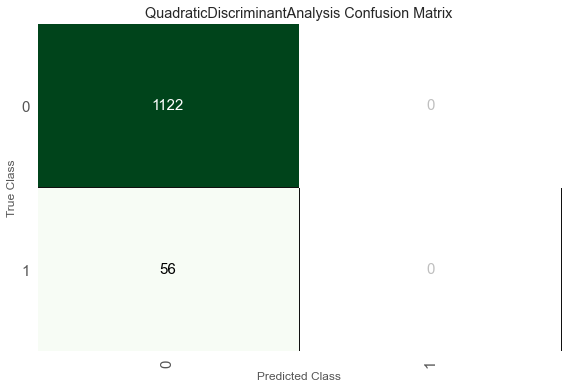

In [86]:
plot_model(create_model('qda'), plot = 'confusion_matrix')

### Naive Bayes

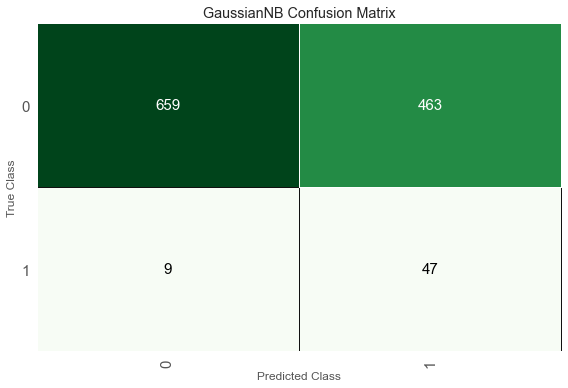

In [88]:
plot_model(create_model('nb'), plot = 'confusion_matrix')

### Decision Tree Classifier

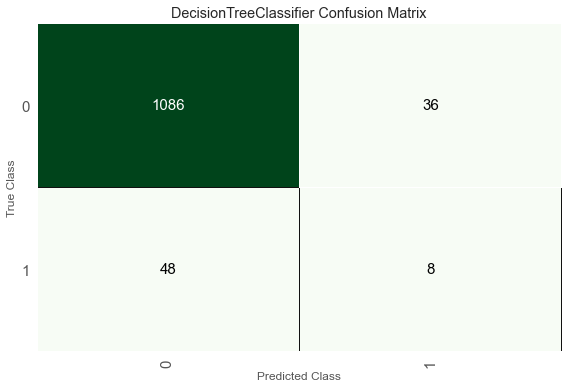

In [87]:
plot_model(create_model('dt'), plot = 'confusion_matrix')

Observa-se que 25% dos AVCs levam a morte do paciênte.

fonte: encurtador.com.br/iAHR8

Conclusões:
Olhando para os números é razoável utilizar um modelo que erre mais, mas que salve mais vidas. Pois, mesmo que o modelo 'nb' leve 463 pessoas ao hospital sem necessidade, não vai por em risco a vida de 56 pessoas, potencialmente levando a morte de 1/4 desses, como observado no modelo 'qda'.

## Aprimorando o Modelo Escolhido - Quadratic Discriminant Analysis

In [90]:
nb_tunado = tune_model(nb, optimize= 'Recall')
print(nb_tunado)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4364,0.7266,0.9091,0.0610,0.1143,0.0425,0.1301
1,0.5855,0.7617,0.8182,0.0744,0.1364,0.0680,0.1555
2,0.6109,0.9022,1.0000,0.0932,0.1705,0.1051,0.2355
3,0.6509,0.8475,0.9091,0.0952,0.1724,0.1078,0.2215
4,0.6182,0.7769,0.6364,0.0648,0.1176,0.0486,0.1018
5,0.6255,0.8678,0.9091,0.0893,0.1626,0.0968,0.2085
6,0.5600,0.7355,0.8182,0.0703,0.1295,0.0603,0.1443
7,0.5927,0.7890,0.8333,0.0833,0.1515,0.0784,0.1710
8,0.6241,0.8120,0.8182,0.0818,0.1488,0.0817,0.1739
9,0.5839,0.8942,1.0000,0.0880,0.1618,0.0950,0.2233


GaussianNB(priors=None, var_smoothing=2e-09)


### Métricas do Modelo

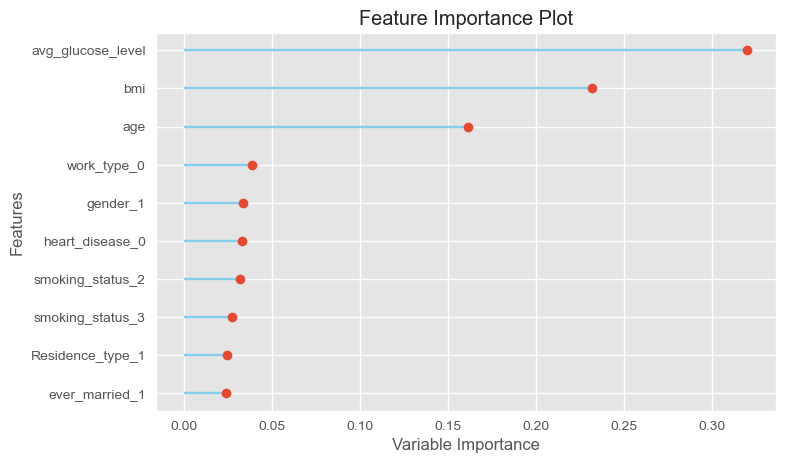

In [91]:
plot_model(create_model('dt'), plot = 'feature')

In [98]:
evaluate_model(nb_tunado)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Aplicando o modelo na base de teste

In [99]:
predict_model(nb_tunado)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6222,0.8159,0.8214,0.0956,0.1713,0.0942,0.1878


,age,avg_glucose_level,bmi,gender_1,hypertension_0,heart_disease_0,ever_married_1,work_type_0,work_type_1,work_type_2,work_type_3,work_type_4,Residence_type_1,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3,stroke,Label,Score
0,13.0,111.480003,20.799999,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0,0,1.0000
1,43.0,67.500000,20.400000,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0.6694
2,54.0,72.959999,37.700001,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0.6787
3,13.0,73.480003,22.900000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,1.0000
4,60.0,80.860001,31.000000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0.8859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,37.0,118.410004,25.100000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9930
1174,39.0,92.820000,37.400002,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.8496
1175,17.0,85.070000,21.100000,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1.0000
1176,50.0,103.480003,29.100000,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0.5810


### Finalizando o modelo

Todos os dados de 'df' são usados no treino do modelo, não há mais a partição entre treino/teste.

In [100]:
qda_final = finalize_model(nb_tunado)

In [101]:
print(qda_final)

GaussianNB(priors=None, var_smoothing=2e-09)
